In [47]:
''' 
General Neuron:
   |______Sensory Neuron:
   |            |____Photoreceptor
   |            |____Mechanoreceptor
   |
   |______Motor Neuron:
                |____Alpha Motor Neuron
                |____Gamma Motor Neuron
'''

' \nGeneral Neuron:\n   |______Sensory Neuron:\n   |            |____Photoreceptor\n   |            |____Mechanoreceptor\n   |\n   |______Motor Neuron:\n                |____Alpha Motor Neuron\n                |____Gamma Motor Neuron\n'

In [48]:
pip install numpy matplotlib panda

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [49]:
# A generic neuron with basic properties and functions common to all neuron types.
class GeneralNeuron:
    # Constructor (with defualt value for firing_rate)
    def __init__(self, firing_rate=0.0):
        self.firing_rate = firing_rate

    # Calculates a firing rate based on the strength of that stimulus.
    def Activate(self, stimulus):
        pass

# A neuron that detects and responds to external stimuli. Each sensory neuron is sensitive to a specific type of stimulus.
class SensoryNeuron(GeneralNeuron):
    # Constructor
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

# Process the specific stimulus and activate the neuron
    def SenseStimulus(self):
        pass

# A neuron responsible for initiating muscle movement by sending activation signals to a target muscle.
class MotorNeuron(GeneralNeuron):
    # Constructor
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    # Trigger a response in the target muscle
    def ControlMuscle(self):
        pass

# A sensory neuron specifically sensitive to light.
class Photoreceptor(SensoryNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")

    # Activate based on light intensity
    def LightDetection(self, light_intensity):
        pass

# A sensory neuron that responds to pressure.
class Mechanoreceptor(SensoryNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")

    # Activate based on pressure level
    def PressureDetection(self, pressure):
        pass

# A motor neuron that controls skeletal muscles.
class AlphaMotorNeuron(MotorNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    # Initiate muscle contraction or movement
    def SkeletalMuscleControl(self):
        pass

# A motor neuron that controls muscle spindles, helping regulate muscle tone.
class GammaMotorNeuron(MotorNeuron):
    # Constructor
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    # Adjust muscle spindle tension
    def MuscleSpindleControl(self):
        pass

The length of the original array: 100
The length of the sampled array: 28


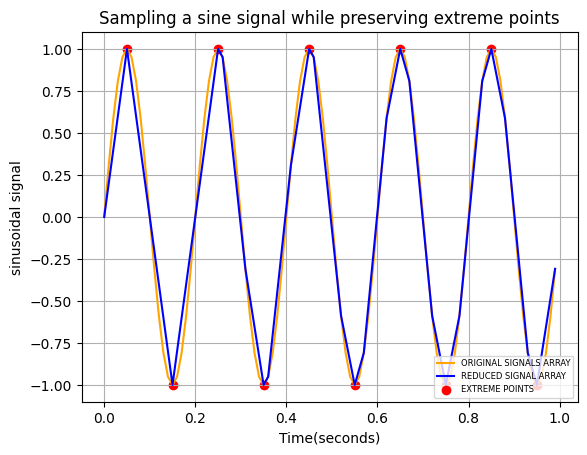

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculateExtrime(arr: np.array):
    '''The np.diff function calculates the difference between adjacent values ​​in the array.
    I use this to calculate the rate of change (slope) between adjacent points in the signal.
    This helps me detect changes in direction (increase or decrease in the sine wave).'''
    slope = np.diff(arr)

    '''I use this logic to detect local maxima and minima:
    (slope[:-1] > 0) checks where the slope is positive (ascending) except for the last value.
    (slope[1:] < 0) checks where the slope is negative (descending) except for the first value.
    If the slope is positive and then becomes negative, this is a local maximum (peak).
    I use np.where to find the indices where the condition is true.
    The result is an index list, but since np.diff returns differences between adjacent values,
    the extreme points in the original array are always one step ahead. We add 1 to correct this.'''
    maxima = np.where((slope[:-1] > 0) & (slope[1:] < 0))[0] + 1

    minima = np.where((slope[:-1] < 0) & (slope[1:] > 0))[0] + 1

    # Return two values: the maxima values and minima values.
    return maxima, minima

def sinusoidalSignal(arr: np.array):
    # Set the number of steps to divide the signal by 5. This means I want to reduce the array by 20%.
    steps = 5 
    
    # Calculate the size of the sampled array by dividing the original array length by 'steps'.
    # Ensure that there is at least one value in the new array (using max to avoid zero division).
    size = max(len(arr) // steps, 1)

    # calculateExtreme function.
    maxima, minima = calculateExtrime(arr)
    
    '''I use np.linspace to create an array of evenly spaced points, ensuring 20% of the original points are selected.
    np.linspace returns float values by default, so I convert them to integers (dtype=int) for indexing the array.'''
    sampledPoint = np.linspace(0, len(arr) - 1, size, dtype=int)
    
    '''I use np.concatenate to combine the sampled points, maxima, and minima into a single array of indices.
    Then, np.unique ensures there are no duplicate indices by returning only unique values.'''
    all_indices = np.unique(np.concatenate((sampledPoint, maxima, minima)))
    
    # Return two values: the values in the original array at the indices I calculated, and the indices themselves.
    return arr[all_indices], all_indices

# Below is the code to verify the functionality of the implementation:

# Generate a time array from 0 to 1 second with a step size of 0.01 seconds (i.e., time is from 0 to 1, with 100 points).
time = np.arange(0, 1, 0.01)

# Set the frequency of the sinusoidal signal to 5 Hz (5 cycles per second).
frequency = 5  

# Create the array of sinusoidal signal using the sin function with the given frequency.
arr = np.sin(2 * np.pi * frequency * time)

# Call calculateExtreme function.
maxima, minima = calculateExtrime(arr)

# Call the function to downsample the sinusoidal signal.
sampleArr, sampleIndices = sinusoidalSignal(arr)

# Map the sampled indices to their corresponding time values.
newTime = time[sampleIndices]

# Print the length of the original array.
print("The length of the original array:", len(arr))

# Print the length of the sampled array.
print("The length of the sampled array:", len(sampleArr))

# Visualization:
# Plot the original signal in orange.
plt.plot(time, arr, label="ORIGINAL SIGNALS ARRAY", color='orange')

# Plot the downsampled signal in blue.
plt.plot(newTime, sampleArr, label="REDUCED SIGNAL ARRAY", color='blue')

# Mark and scatter the local maxima (red points).
plt.scatter(time[maxima], arr[maxima], color='red', label="EXTREME POINTS")

# Mark and scatter the local minima (red points).
plt.scatter(time[minima], arr[minima], color='red')

# Add a title and labels to the plot.
plt.title('Sampling a sine signal while preserving extreme points')
plt.xlabel('Time(seconds)')
plt.ylabel('sinusoidal signal')

# Display the legend in the lower right corner with a font size of 6.
plt.legend(loc='lower right', fontsize=6)
# Prints squares on the screen.
plt.grid(True)
# Show the graph.
plt.show()


In [51]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [52]:
import pandas as pd
df = pd.read_csv("C:/Users/matan/Downloads/laptop_price - dataset.csv")
df.head(20)


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.0,4,500GB HDD,AMD,Radeon R5,Windows 10,2.10,400.00
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.2,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,256GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,1158.70
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel,Core i7 8550U,1.8,16,512GB SSD,Nvidia,GeForce MX150,Windows 10,1.30,1495.00
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.6,8,256GB SSD,Intel,UHD Graphics 620,Windows 10,1.60,770.00
